# Определение выгодного тарифа для телеком компании

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

data_calls = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Telecom/calls.csv')
display(data_calls.head(5))
pd.options.display.max_columns = 100

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица со звонками состоит из 202607 строк, явных пропусков данных нет.

In [3]:
#проверяю дубликаты
print('Общее число дубликатов:', data_calls.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', data_calls.isna().sum())

Общее число дубликатов: 0
Общее число пропущенных значений: id           0
call_date    0
duration     0
user_id      0
dtype: int64


Явных пропусков данных и явных дубликатов не обнаружено.

In [4]:
data_internet = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Telecom/internet.csv')
display(data_internet.head(5))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
#проверяю дубликаты
print('Общее число дубликатов:', data_internet.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', data_internet.isna().sum())

Общее число дубликатов: 0
Общее число пропущенных значений: Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


Таблица с интернет-трафиком состоит из 149 396 строк, явных пропусков данных и дубликатов не обнаружено.

In [7]:
data_messages = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Telecom/messages.csv')
display(data_messages.head(5))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
data_messages.info()
#проверяю дубликаты
print('Общее число дубликатов:', data_messages.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', data_messages.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Общее число дубликатов: 0
Общее число пропущенных значений: id              0
message_date    0
user_id         0
dtype: int64


Таблица с сообщениями состоит из 123 036 строк, явных пропусков данных и дубликатов не обнаружено

In [9]:
data_tariffs = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Telecom/tariffs.csv')
display(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
data_users = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Telecom/users.csv')
display(data_users.head(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
data_users.info()

#проверяю дубликаты
print('Общее число дубликатов:', data_users.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', data_users.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Общее число дубликатов: 0
Общее число пропущенных значений: user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


Из 500 пользователей 462 продолжают пользоваться различными тарифами оператора, 38 закрыли договор.

## Предобработка данных

Изменяем тип данных object в столбцах с датой.
Добавляем столбец с месяцем и годом во все таблицы, для которых релевантно.

In [12]:
#заменяем дату звонка на формат даты
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
data_calls['month']=data_calls['call_date'].dt.month
data_calls['year']=data_calls['call_date'].dt.year
#каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. 
#Поэтому округляем каждый звонок до минут.
data_calls['duration']=np.ceil(data_calls['duration'])
display(data_calls.head())
data_calls.info()

,id,call_date,duration,user_id,month,year
0,1000_0,2018-07-25,0.0,1000,7,2018
1,1000_1,2018-08-17,0.0,1000,8,2018
2,1000_2,2018-06-11,3.0,1000,6,2018
3,1000_3,2018-09-21,14.0,1000,9,2018
4,1000_4,2018-12-15,6.0,1000,12,2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
 5   year       202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.3+ MB


In [13]:
#заменяем дату сессии на формат даты
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
data_internet['month']=data_internet['session_date'].dt.month
data_internet['year']=data_internet['session_date'].dt.year
display(data_internet.head())
data_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id,month,year
0,0,1000_0,112.95,2018-11-25,1000,11,2018
1,1,1000_1,1052.81,2018-09-07,1000,9,2018
2,2,1000_2,1197.26,2018-06-25,1000,6,2018
3,3,1000_3,550.27,2018-08-22,1000,8,2018
4,4,1000_4,302.56,2018-09-24,1000,9,2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  int64         
 6   year          149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 8.0+ MB


In [14]:
#заменяем дату сообщения на формат даты
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
data_messages['month']=data_messages['message_date'].dt.month
data_messages['year']=data_messages['message_date'].dt.year
display(data_messages.head())
data_messages.info()

,id,message_date,user_id,month,year
0,1000_0,2018-06-27,1000,6,2018
1,1000_1,2018-10-08,1000,10,2018
2,1000_2,2018-08-04,1000,8,2018
3,1000_3,2018-06-16,1000,6,2018
4,1000_4,2018-12-05,1000,12,2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
 4   year          123036 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.7+ MB


In [15]:
#заменяем дату регистрации и дату завершения договора пользователя на формат даты (где применимо)
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
data_users['reg_month']=data_users['reg_date'].dt.month
data_users['reg_year']=data_users['reg_date'].dt.year
data_users['churn_month']=data_users['churn_date'].dt.month
data_users['churn_year']=data_users['churn_date'].dt.year
display(data_users.head())
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,reg_year,churn_month,churn_year
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2018,NaN,NaN
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,2018,NaN,NaN
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,2018,NaN,NaN
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,2018,NaN,NaN
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,2018,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   38 non-null     datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff       500 non-null    object        
 8   reg_month    500 non-null    int64         
 9   reg_year     500 non-null    int64         
 10  churn_month  38 non-null     float64       
 11  churn_year   38 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 47.0+ KB


## Расчеты и добавление результатов в таблицу

Количество сделанных звонков и израсходованных минут разговора по месяцам

In [16]:
data_calls_grouped = data_calls.groupby(['user_id','month']).agg({'call_date':'count','duration':'sum'})
data_calls_grouped.rename(columns = {'call_date' : 'call_qnt', 'duration' : 'call_duration'}, inplace = True)
data_calls_grouped = data_calls_grouped.reset_index()
display(data_calls_grouped.head(10))

,user_id,month,call_qnt,call_duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
5,1000,10,57,350.0
6,1000,11,43,338.0
7,1000,12,46,333.0
8,1001,11,59,430.0
9,1001,12,63,414.0


Количество отправленных сообщений по месяцам

In [17]:
data_messages_grouped = data_messages.groupby(['user_id','month']).agg({'message_date':'count'})
data_messages_grouped.rename(columns = {'message_date' : 'message_qnt',}, inplace = True)
data_messages_grouped = data_messages_grouped.reset_index()
display(data_messages_grouped.head(10))

,user_id,month,message_qnt
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Объем израсходованного интернет-трафика по месяцам

In [18]:
data_internet_grouped = data_internet.groupby(['user_id','month']).agg({'mb_used':'sum'})
data_internet_grouped = data_internet_grouped.reset_index()
display(data_internet_grouped.head(10))

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


In [19]:
data_merge = data_calls_grouped.merge(data_messages_grouped, on=['user_id', 'month'], how = 'outer')

In [20]:
display(data_merge.head(10))

,user_id,month,call_qnt,call_duration,message_qnt
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0
5,1000,10,57.0,350.0,73.0
6,1000,11,43.0,338.0,58.0
7,1000,12,46.0,333.0,70.0
8,1001,11,59.0,430.0,NaN
9,1001,12,63.0,414.0,NaN


In [21]:
data_merge = data_merge.merge(data_internet_grouped, on=['user_id', 'month'], how = 'outer')

In [22]:
display(data_merge.head(10))

,user_id,month,call_qnt,call_duration,message_qnt,mb_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91
5,1000,10,57.0,350.0,73.0,14702.49
6,1000,11,43.0,338.0,58.0,14756.47
7,1000,12,46.0,333.0,70.0,9817.61
8,1001,11,59.0,430.0,NaN,18429.34
9,1001,12,63.0,414.0,NaN,14036.66


In [23]:
data_merge = data_merge.merge(data_users[['user_id', 'tariff', 'city']], on = ['user_id'], how = 'outer')
display(data_merge.head(10))

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,Краснодар
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,Краснодар
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,Краснодар
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,Краснодар
5,1000,10.0,57.0,350.0,73.0,14702.49,ultra,Краснодар
6,1000,11.0,43.0,338.0,58.0,14756.47,ultra,Краснодар
7,1000,12.0,46.0,333.0,70.0,9817.61,ultra,Краснодар
8,1001,11.0,59.0,430.0,NaN,18429.34,smart,Москва
9,1001,12.0,63.0,414.0,NaN,14036.66,smart,Москва


**Приведем данные "в порядок":**
* Приведем мегабайты в гигабайты делением значений на 1024.
* Округлим общую сумму гигабайт за месяц в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [25]:
data_tariffs = data_tariffs.rename(columns = {'tariff_name' : 'tariff'})
display(data_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [26]:
#добавим условия по тарифам для каждого пользователя
data_merge = data_merge.merge(data_tariffs, on = ['tariff'], how = 'left')
display(data_merge.head(10))

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,10.0,57.0,350.0,73.0,14702.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,11.0,43.0,338.0,58.0,14756.47,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,12.0,46.0,333.0,70.0,9817.61,ultra,Краснодар,1000,30720,3000,1950,150,1,1
8,1001,11.0,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3
9,1001,12.0,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3


In [27]:
data_merge['gb_extra']=np.ceil((data_merge['mb_used']-data_merge['mb_per_month_included'])/1024)
data_merge['messages_extra']=data_merge['message_qnt']-data_merge['messages_included']
data_merge['call_extra']=data_merge['call_duration']-data_merge['minutes_included']
display(data_merge.head(20))

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27.0,-978.0,-2841.0
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7.0,-940.0,-2828.0
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-925.0,-2660.0
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-919.0,-2592.0
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-943.0,-2534.0
5,1000,10.0,57.0,350.0,73.0,14702.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-927.0,-2650.0
6,1000,11.0,43.0,338.0,58.0,14756.47,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-942.0,-2662.0
7,1000,12.0,46.0,333.0,70.0,9817.61,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-20.0,-930.0,-2667.0
8,1001,11.0,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3,3.0,NaN,-70.0
9,1001,12.0,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3,-1.0,NaN,-86.0


Создадим функцию для расчета экстра платежей при превышении лимитов, установленных тарифами.

In [28]:
def extra_fee(row):   
    
    extra_fee = 0
    
    gb_extra = row['gb_extra']
    messages_extra = row['messages_extra']
    call_extra = row['call_extra']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    
    if gb_extra >= 0:
        extra_fee += gb_extra*rub_per_gb

    if messages_extra >= 0:
        extra_fee += messages_extra*rub_per_message
   
    if call_extra >= 0:
        extra_fee += call_extra*rub_per_minute
    
    return extra_fee

#проверка работы функции
#row_values = [15, 36, 4, 200, 1, 1]
#row_columns = ['gb_extra', 'call_extra', 'messages_extra', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']
#row = pd.Series(data = row_values, index = row_columns)
#extra_fee(row)


data_merge['extra_fee'] = data_merge.apply(extra_fee, axis = 1)
display(data_merge.head(10))

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27.0,-978.0,-2841.0,0.0
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7.0,-940.0,-2828.0,0.0
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-925.0,-2660.0,0.0
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-919.0,-2592.0,0.0
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-943.0,-2534.0,0.0
5,1000,10.0,57.0,350.0,73.0,14702.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-927.0,-2650.0,0.0
6,1000,11.0,43.0,338.0,58.0,14756.47,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-942.0,-2662.0,0.0
7,1000,12.0,46.0,333.0,70.0,9817.61,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-20.0,-930.0,-2667.0,0.0
8,1001,11.0,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3,3.0,NaN,-70.0,600.0
9,1001,12.0,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3,-1.0,NaN,-86.0,0.0


In [29]:
data_merge['total_fee'] = data_merge['extra_fee'] + data_merge['rub_monthly_fee']
display(data_merge.head(10))

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee,total_fee
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27.0,-978.0,-2841.0,0.0,1950.0
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7.0,-940.0,-2828.0,0.0,1950.0
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-925.0,-2660.0,0.0,1950.0
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-919.0,-2592.0,0.0,1950.0
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-943.0,-2534.0,0.0,1950.0
5,1000,10.0,57.0,350.0,73.0,14702.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-927.0,-2650.0,0.0,1950.0
6,1000,11.0,43.0,338.0,58.0,14756.47,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-942.0,-2662.0,0.0,1950.0
7,1000,12.0,46.0,333.0,70.0,9817.61,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-20.0,-930.0,-2667.0,0.0,1950.0
8,1001,11.0,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3,3.0,NaN,-70.0,600.0,1150.0
9,1001,12.0,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3,-1.0,NaN,-86.0,0.0,550.0


## Исследовательский анализ данных

In [30]:
smart = data_merge[data_merge['tariff'] == "smart"]
display(smart.head())

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee,total_fee
8,1001,11.0,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3,3.0,NaN,-70.0,600.0,1150.0
9,1001,12.0,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3,-1.0,NaN,-86.0,0.0,550.0
10,1002,6.0,15.0,117.0,4.0,10856.82,smart,Стерлитамак,50,15360,500,550,200,3,3,-4.0,-46.0,-383.0,0.0,550.0
11,1002,7.0,26.0,214.0,11.0,17580.10,smart,Стерлитамак,50,15360,500,550,200,3,3,3.0,-39.0,-286.0,600.0,1150.0
12,1002,8.0,42.0,289.0,13.0,20319.26,smart,Стерлитамак,50,15360,500,550,200,3,3,5.0,-37.0,-211.0,1000.0,1550.0


In [31]:
ultra = data_merge[data_merge['tariff'] == "ultra"]
display(ultra.head())

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee,total_fee
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27.0,-978.0,-2841.0,0.0,1950.0
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7.0,-940.0,-2828.0,0.0,1950.0
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-925.0,-2660.0,0.0,1950.0
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-919.0,-2592.0,0.0,1950.0
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-943.0,-2534.0,0.0,1950.0


In [32]:
moscow = data_merge[data_merge['city'] == 'Москва']
display(moscow.head())

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee,total_fee
8,1001,11.0,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3,3.0,NaN,-70.0,600.0,1150.0
9,1001,12.0,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3,-1.0,NaN,-86.0,0.0,550.0
17,1003,8.0,55.0,380.0,37.0,8565.21,ultra,Москва,1000,30720,3000,1950,150,1,1,-21.0,-963.0,-2620.0,0.0,1950.0
18,1003,9.0,134.0,961.0,91.0,12468.87,ultra,Москва,1000,30720,3000,1950,150,1,1,-17.0,-909.0,-2039.0,0.0,1950.0
19,1003,10.0,108.0,855.0,83.0,14768.14,ultra,Москва,1000,30720,3000,1950,150,1,1,-15.0,-917.0,-2145.0,0.0,1950.0


In [33]:
region = data_merge[data_merge['city'] != 'Москва']
display(region.head())

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee,total_fee
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-27.0,-978.0,-2841.0,0.0,1950.0
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-7.0,-940.0,-2828.0,0.0,1950.0
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-925.0,-2660.0,0.0,1950.0
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-16.0,-919.0,-2592.0,0.0,1950.0
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-15.0,-943.0,-2534.0,0.0,1950.0


<AxesSubplot:>

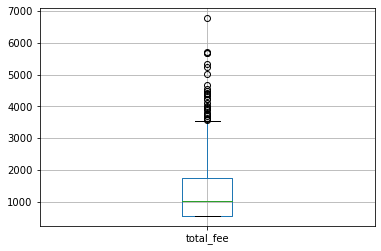

In [34]:
smart.boxplot(column='total_fee')

Из диаграммы размаха пользователей тарифа Smart видно, что медиана находится где-то на 1000 руб., в "ящике" значения от 550 до 1800 руб. Значения нормального распределения от 550 руб. (минимальный тариф) до 3500 руб. Свыше 3500 - выбросы.

<AxesSubplot:>

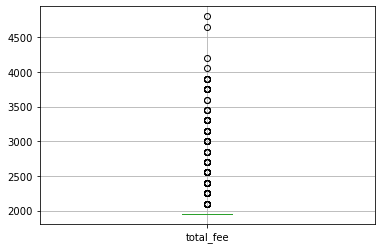

In [35]:
ultra.boxplot(column='total_fee')

Из диаграммы размаха пользователей тарифа Ultra видно, что большая часть пользователей платит только абонентскую плату в 1950 руб., оплаты сверх тарифа бывают редко и являются выбросами.

In [36]:
smart['total_fee'].describe()

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: total_fee, dtype: float64

Среднее значение и медиана отличаются, что говорит о наличии выбросов. Остальные значения в целом подтверждают выводы, сделанные из диаграммы размаха.

In [37]:
ultra['total_fee'].describe()

count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total_fee, dtype: float64

Среднее значение и медиана отличаются незначительно, что говорит о малом количестве выбросов. Остальные значения в целом подтверждают выводы, сделанные из диаграммы размаха.

Text(0, 0.5, 'Количество клиентов')

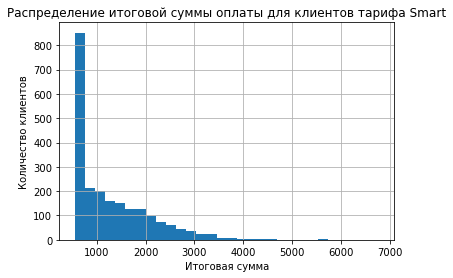

In [38]:
smart['total_fee'].hist(bins=30)

plt.title('Распределение итоговой суммы оплаты для клиентов тарифа Smart')
plt.xlabel('Итоговая сумма')
plt.ylabel('Количество клиентов')

Гистограмма имеет пик: на 550 руб., далее распределение похоже на нормальное с выбросами за пределами примерно 2500 руб.

Text(0, 0.5, 'Количество клиентов')

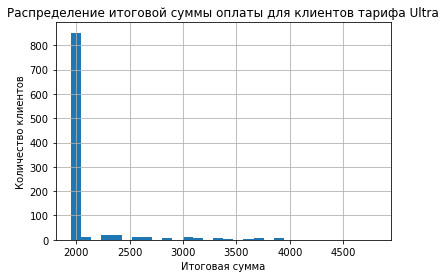

In [39]:
ultra['total_fee'].hist(bins=30)
plt.title('Распределение итоговой суммы оплаты для клиентов тарифа Ultra')
plt.xlabel('Итоговая сумма')
plt.ylabel('Количество клиентов')

Гистограмма имеет пик на 1950 руб., далее выбросы.

In [40]:
display(smart.sort_values(by = 'total_fee', ascending = False).head(15))

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee,total_fee
3108,1486,12.0,133.0,1007.0,83.0,38552.45,smart,Нижний Новгород,50,15360,500,550,200,3,3,23.0,33.0,507.0,6220.0,6770.0
260,1042,12.0,121.0,728.0,75.0,37165.69,smart,Хабаровск,50,15360,500,550,200,3,3,22.0,25.0,228.0,5159.0,5709.0
3107,1486,11.0,108.0,764.0,96.0,36266.11,smart,Нижний Новгород,50,15360,500,550,200,3,3,21.0,46.0,264.0,5130.0,5680.0
1622,1261,12.0,141.0,1074.0,22.0,32650.91,smart,Казань,50,15360,500,550,200,3,3,17.0,-28.0,574.0,5122.0,5672.0
1793,1286,12.0,95.0,739.0,68.0,35108.07,smart,Москва,50,15360,500,550,200,3,3,20.0,18.0,239.0,4771.0,5321.0
1000,1159,12.0,110.0,734.0,2.0,35135.89,smart,Красноярск,50,15360,500,550,200,3,3,20.0,-48.0,234.0,4702.0,5252.0
615,1098,12.0,80.0,588.0,14.0,36523.90,smart,Челябинск,50,15360,500,550,200,3,3,21.0,-36.0,88.0,4464.0,5014.0
1621,1261,11.0,117.0,738.0,25.0,32503.56,smart,Казань,50,15360,500,550,200,3,3,17.0,-25.0,238.0,4114.0,4664.0
1914,1306,12.0,66.0,484.0,NaN,34912.13,smart,Чита,50,15360,500,550,200,3,3,20.0,NaN,-16.0,4000.0,4550.0
1069,1172,6.0,73.0,541.0,2.0,33886.40,smart,Санкт-Петербург,50,15360,500,550,200,3,3,19.0,-48.0,41.0,3923.0,4473.0


По первым 15 строкам с максимальными значениями оплат видно, что пользователи с максимальной оплатой по Smart проживают не в Москве.

In [41]:
display(ultra.sort_values(by = 'total_fee', ascending = False).head(15))

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee,total_fee
782,1124,10.0,152.0,1225.0,121.0,49745.69,ultra,Махачкала,1000,30720,3000,1950,150,1,1,19.0,-879.0,-1775.0,2850.0,4800.0
1499,1240,8.0,54.0,457.0,NaN,48351.59,ultra,Воронеж,1000,30720,3000,1950,150,1,1,18.0,NaN,-2543.0,2700.0,4650.0
1597,1255,7.0,37.0,263.0,NaN,45180.71,ultra,Саранск,1000,30720,3000,1950,150,1,1,15.0,NaN,-2737.0,2250.0,4200.0
1884,1300,11.0,88.0,658.0,170.0,44296.86,ultra,Москва,1000,30720,3000,1950,150,1,1,14.0,-830.0,-2342.0,2100.0,4050.0
383,1060,12.0,184.0,1233.0,52.0,43931.36,ultra,Калуга,1000,30720,3000,1950,150,1,1,13.0,-948.0,-1767.0,1950.0,3900.0
159,1024,11.0,157.0,1146.0,NaN,43107.47,ultra,Санкт-Петербург,1000,30720,3000,1950,150,1,1,13.0,NaN,-1854.0,1950.0,3900.0
1147,1180,10.0,19.0,98.0,18.0,43574.62,ultra,Москва,1000,30720,3000,1950,150,1,1,13.0,-982.0,-2902.0,1950.0,3900.0
1496,1240,5.0,59.0,395.0,NaN,43824.90,ultra,Воронеж,1000,30720,3000,1950,150,1,1,13.0,NaN,-2605.0,1950.0,3900.0
2394,1380,12.0,104.0,735.0,30.0,43304.50,ultra,Ростов-на-Дону,1000,30720,3000,1950,150,1,1,13.0,-970.0,-2265.0,1950.0,3900.0
1503,1240,12.0,63.0,431.0,NaN,43325.30,ultra,Воронеж,1000,30720,3000,1950,150,1,1,13.0,NaN,-2569.0,1950.0,3900.0


Вариативность по городам большая, но встречается и Москва.

In [42]:
display('Города Smart:', smart['city'].sort_values().unique())
display('Города Ultra:', ultra['city'].sort_values().unique())
display('Количество уникальных городов smart:', smart['city'].value_counts().count())
display('Количество уникальных городов ultra:', ultra['city'].value_counts().count())
value_counts_smart = smart['city'].value_counts().head(10)
value_counts_ultra = ultra['city'].value_counts().head(10)
display('Количество по городам smart', value_counts_smart)
display('Количество по городам ultra', value_counts_ultra)

'Города Smart:'

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград', 'Волжский',
       'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург', 'Ижевск',
       'Иркутск', 'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров',
       'Кострома', 'Краснодар', 'Красноярск', 'Курган', 'Курск', 'Липецк',
       'Магнитогорск', 'Махачкала', 'Москва', 'Мурманск',
       'Набережные Челны', 'Нижний Новгород', 'Нижний Тагил',
       'Новокузнецк', 'Новороссийск', 'Новосибирск', 'Омск', 'Оренбург',
       'Орёл', 'Пенза', 'Пермь', 'Петрозаводск', 'Подольск',
       'Ростов-на-Дону', 'Рязань', 'Самара', 'Санкт-Петербург', 'Саранск',
       'Саратов', 'Севастополь', 'Смоленск', 'Сочи', 'Ставрополь',
       'Стерлитамак', 'Тамбов', 'Тверь', 'Тольятти', 'Томск', 'Тула',
       'Тюмень', 'Улан-Удэ', 'Ульяновск', 'Уфа', 'Хабаровск', 'Химки',
       'Чебоксары', 'Челябинск', 'Череповец', 'Чита', 'Якутск',
       'Ярославль'], dtype=object)

'Города Ultra:'

array(['Астрахань', 'Балашиха', 'Барнаул', 'Брянск', 'Владивосток',
       'Владимир', 'Волгоград', 'Волжский', 'Вологда', 'Воронеж',
       'Екатеринбург', 'Иваново', 'Иркутск', 'Казань', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Магнитогорск', 'Махачкала', 'Москва', 'Мурманск',
       'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новосибирск', 'Омск', 'Оренбург',
       'Пенза', 'Пермь', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Стерлитамак', 'Сургут', 'Тверь', 'Тольятти', 'Томск',
       'Тула', 'Тюмень', 'Ульяновск', 'Уфа', 'Чебоксары', 'Челябинск',
       'Череповец', 'Ярославль'], dtype=object)

'Количество уникальных городов smart:'

72

'Количество уникальных городов ultra:'

57

'Количество\xa0по городам smart'

Москва              386
Санкт-Петербург     210
Ульяновск            81
Казань               74
Уфа                  65
Новосибирск          54
Омск                 54
Самара               54
Набережные Челны     49
Улан-Удэ             48
Name: city, dtype: int64

'Количество\xa0по городам ultra'

Москва             225
Санкт-Петербург     60
Новосибирск         44
Пенза               43
Краснодар           41
Воронеж             31
Уфа                 30
Брянск              28
Пермь               26
Нижний Новгород     23
Name: city, dtype: int64

Москва однозначно лидирует по подключению тарифа Ultra (по количеству пользователей и месяцев использования). Smart используется в бОльшем количестве городов.

In [43]:
display('Количество тарифов:', data_merge['tariff'].value_counts())

'Количество тарифов:'

smart    2230
ultra     986
Name: tariff, dtype: int64

По количеству пользователей / месяцев подключения лидер Smart.

Общий вывод: пользователи тарифа Ultra приносят больше дохода компании, чем пользователи тарифа Smart.

Smart


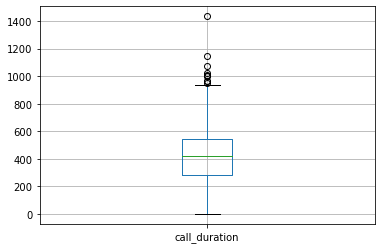

Ultra


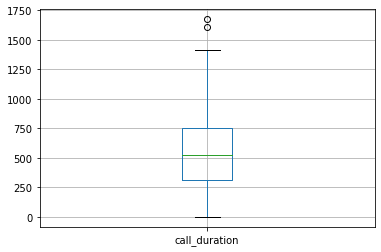

In [44]:
#диаграмма разброса по количеству минут разговора
print('Smart')
smart.boxplot(column='call_duration')
plt.show()
print('Ultra')
ultra.boxplot(column='call_duration')
plt.show()

Из диаграммы разброса видно, что медиана количества минут пользователя тарифа Smart в месяц составляет чуть более 400 минут, а тарифа Ultra - 500.
При этом диапазон нормального распределения для тарифа Smart составляет от 0 до 900 минут, тогда как для пользователя Ultra - от 0 до 1400.
Большая часть значений для тарифа Smart лежит в диапазоне от 250 до 550 минут, для Ultra - от 260 до 750 минут.

In [45]:
#диаграмма разброса по количеству минут разговора
print('Smart')
display(smart['call_duration'].describe())


print('Ultra')
ultra['call_duration'].describe()

Smart


count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: call_duration, dtype: float64

Ultra


count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: call_duration, dtype: float64

Выводы по диаграмме распределения подтверждены с небольшими отклонениями по точным цифрам. Разброс между средней и медианой небольшой, что говорит о малом количестве выбросов.

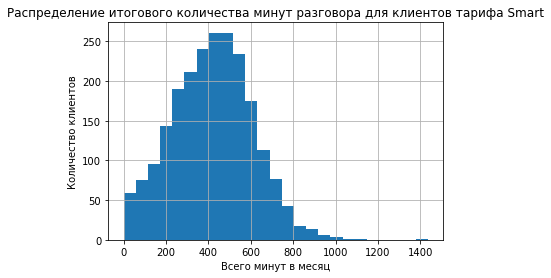

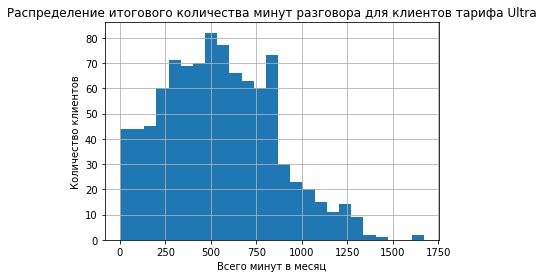

In [46]:
smart['call_duration'].hist(bins=25)
plt.title('Распределение итогового количества минут разговора для клиентов тарифа Smart')
plt.xlabel('Всего минут в месяц')
plt.ylabel('Количество клиентов')
plt.show()
ultra['call_duration'].hist(bins=25)
plt.title('Распределение итогового количества минут разговора для клиентов тарифа Ultra')
plt.xlabel('Всего минут в месяц')
plt.ylabel('Количество клиентов')
plt.show()

Диаграмма минут звонков владельцев тарифа Ultra больше похожа на нормальное распределение с пиком в диапазоне от 400 до 450 минут разговора.
Тогда как диаграмма распределения количества минут разговора тарифа Smart имеет несколько пиков - на 500 минутах, на 26- минутах и на 800 минутах.
В обоих графиках есть достаточно большой столбец по значениям 0 - сброшенные звонки.

Общий вывод: пользователи тарифа Smart более активно разговаривают по телефону.

Smart


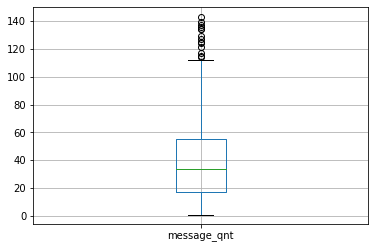

Ultra


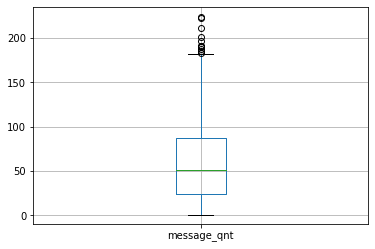

In [47]:
print('Smart')
smart.boxplot(column='message_qnt')
plt.show()
print('Ultra')
ultra.boxplot(column='message_qnt')
plt.show()

Из диаграммы видно, что большинство пользователей нечасто пользуются сообщениями: медиана составляет около 30 сообщений для тарифа Smart и около 50 сообщений для тарифа Ultra. Диапазон нормального распределения для тарифа Smart составляет от 0 до примерно 110 сообщений. Диапазон нормального распредения для тарифа Ultra - от 0 до 180 сообщений.

In [48]:
print('Smart')
print(smart['message_qnt'].describe())
print('Ultra')
ultra['message_qnt'].describe()

Smart
count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: message_qnt, dtype: float64
Ultra


count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: message_qnt, dtype: float64

В целом, все выводы, сделанные ранее, подтверждены. Среднее значение и медиана для тарифа Smart не сильно отличаются, что говорит, о небольшом количестве выбросов. Для тарифа Ultra разброс больше, следовательно, больше и выбросов.

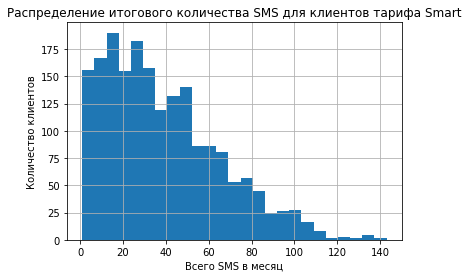

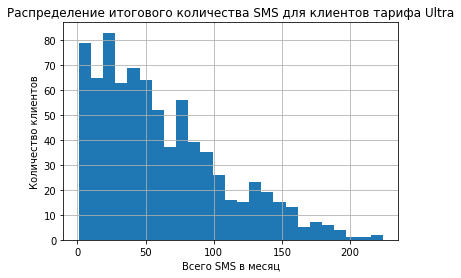

In [49]:
smart['message_qnt'].hist(bins=25)
plt.title('Распределение итогового количества SMS для клиентов тарифа Smart')
plt.xlabel('Всего SMS в месяц')
plt.ylabel('Количество клиентов')
plt.show()
ultra['message_qnt'].hist(bins=25)
plt.title('Распределение итогового количества SMS для клиентов тарифа Ultra')
plt.xlabel('Всего SMS в месяц')
plt.ylabel('Количество клиентов')
plt.show()

Оба графика не похожи на график нормального распределения, скорее, это распределение Пуассона. Большая часть клиентов в месяц отправляет небольшое количество сообщений, чем больше сообщений, тем меньше таких клиентов в месяце.

In [50]:
display(smart.head())

,user_id,month,call_qnt,call_duration,message_qnt,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_extra,messages_extra,call_extra,extra_fee,total_fee
8,1001,11.0,59.0,430.0,NaN,18429.34,smart,Москва,50,15360,500,550,200,3,3,3.0,NaN,-70.0,600.0,1150.0
9,1001,12.0,63.0,414.0,NaN,14036.66,smart,Москва,50,15360,500,550,200,3,3,-1.0,NaN,-86.0,0.0,550.0
10,1002,6.0,15.0,117.0,4.0,10856.82,smart,Стерлитамак,50,15360,500,550,200,3,3,-4.0,-46.0,-383.0,0.0,550.0
11,1002,7.0,26.0,214.0,11.0,17580.10,smart,Стерлитамак,50,15360,500,550,200,3,3,3.0,-39.0,-286.0,600.0,1150.0
12,1002,8.0,42.0,289.0,13.0,20319.26,smart,Стерлитамак,50,15360,500,550,200,3,3,5.0,-37.0,-211.0,1000.0,1550.0


Smart


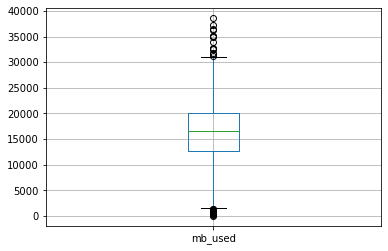

Ultra


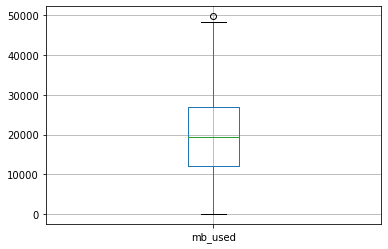

In [51]:
print('Smart')
smart.boxplot(column='mb_used')
plt.show()
print('Ultra')
ultra.boxplot(column='mb_used')
plt.show()

Из диаграммы распределения можно сделать вывод, что пользователи Smart чаще всего используют около 16 000 mb, тогда как пользователи Ultra - около 20 000 mb.  При этом диапазон нормального распредения составляет от 0 до 31000 mb для Smart и от 0 до 49000 mb для Ultra. В тарифе Smart можно наблюдать достаточно много выбросов, тогда как в тарифе Ultra их практически нет (один?).

In [52]:
print('Smart')
print(smart['mb_used'].describe())
print('Ultra')
ultra['mb_used'].describe()

Smart
count     2228.000000
mean     16215.661849
std       5861.736234
min          0.000000
25%      12649.272500
50%      16507.740000
75%      20043.792500
max      38552.450000
Name: mb_used, dtype: float64
Ultra


count      975.000000
mean     19668.485262
std       9943.050284
min          0.000000
25%      12008.305000
50%      19394.290000
75%      26896.550000
max      49745.690000
Name: mb_used, dtype: float64

В целом, выводы подтвержды. В обоих случаях средняя и медиана практически совпадает, что говорит о небольшом количестве выбросов.

Общий вывод: пользователи тарифа Ultra используют больше mb трафика, чем пользователи тарифа Smart.

## Проверка гипотез

**Нулевая гипотеза:** выручка пользователей тарифа Smart и Ultra одинаковая. 
**Альтернативная гипотеза:** выручка пользователей тарифов Smart и Ultra отличается.

In [53]:
ultra_test = ultra['total_fee']
smart_test = smart['total_fee']

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(# проверка гипотезы о равенстве средних двух независимых совокупностей
    ultra_test, 
    smart_test,
    equal_var = False) # т.к. дисперсии не равны

print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


In [54]:
print('Средняя выручка пользователей тарифа Ultra:', ultra['total_fee'].mean())
print('Средняя выручка пользователей тарифа Smart:',smart['total_fee'].mean())

Средняя выручка пользователей тарифа Ultra: 2070.030425963489
Средняя выручка пользователей тарифа Smart: 1289.6417040358745


**Вывод:** средняя выручка пользователей Smart и Ultra отличается. Средняя выручка от пользователей тарифа Ultra больше, чем от пользователей тарифа Smart.

**Нулевая гипотеза:** выручка пользователей Москвы и регионов одинаковая. **Альтернативная гипотеза:** выручка пользователей Москвы и регионов отличается.

In [55]:
moscow_test = moscow['total_fee']
region_test = region['total_fee']

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(# проверка гипотезы о равенстве средних двух независимых совокупностей
    moscow_test, 
    region_test,
    equal_var = False) # т.к. дисперсии не равны

print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000279
Не получилось отвергнуть нулевую гипотезу


In [56]:
print('Средняя выручка от пользователей Москвы:', moscow['total_fee'].mean())
print('Средняя выручка от пользователей в регионах:',region['total_fee'].mean())

Средняя выручка от пользователей Москвы: 1546.7135842880523
Средняя выручка от пользователей в регионах: 1524.7251439539348


Вывод: средняя выручка пользователей Москвы и регионов отличается. При этом различие не настолько существенное, как между пользователями разных тарифов.

## Общий вывод

### Изучение данных из файла

**Таблица со звонками** состоит из 202607 строк, явных пропусков данных и дубликатов нет.
**Таблица с интернет-трафиком** состоит из 149 396 строк, явных пропусков данных и дубликатов не обнаружено.
**Таблица с сообщениями** состоит из 123 036 строк, явных пропусков данных и дубликатов не обнаружено
**Из 500 пользователей 462 продолжают пользоваться** различными тарифами оператора, 38 закрыли договор.

### Обработка данных:
* Изменяем тип данных object в столбцах с датой.
* Добавляем столбец с месяцем и годом во все таблицы, для которых релевантно.
* Округляем звонки до минут в соответствии с тарифами оператора
* *Не стала менять тип числовых данных с float на int, потому что при слиянии таблиц это приводит к появлению пропусков в формате <NA>, которые у меня не получилось заменить ни одним известным способом (fillna, .loc, replace). Расчетам такой вид данных не мешает.*
* Приведем мегабайты в гигабайты делением значений на 1000.
* Округлим общую сумму гигабайт за месяц в бо́льшую сторону. *Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

**Объединяем все таблицы в одну общую** по пользователям и месяцам + добавляем условия по тарифам в таблицу для упрощения расчетов.

**Добавляем новые столбцы:**
* данные с расчетом платежей сверх тарифа, 
* данные с общей суммой платежа: платеж по тарифу плюс экстра.
    
### Исследовательский анализ данных

**Выручка для пользователей разных тарифов:**
* Для пользователей  тарифа Smart: медиана находится где-то на 1000 руб., в "ящике" значения от 550 до 1800 руб. Значения нормального распределения от 550 руб. (минимальный тариф) до 3500 руб. Свыше 3500 - выбросы.
* Для пользователей тарифа Ultra: большая часть пользователей платит только абонентскую плату в 1950 руб., оплаты сверх тарифа бывают редко и являются выбросами.
* **Москва** однозначно лидирует по подключению **тарифа Ultra** (по количеству пользователей и месяцев использования).
* **Smart** используется в бОльшем количестве городов и лидирует по количеству пользователей / месяцев подключения в целом.

**Общий вывод: пользователи тарифа Ultra приносят больше дохода компании, чем пользователи тарифа Smart.**<br>
<br>
<br>
**Количество минут разговора для разных тарифов**:
* медиана количества минут пользователя тарифа Smart в месяц составляет чуть более 400 минут, а тарифа Ultra - 500. При этом диапазон нормального распределения для тарифа Smart составляет от 0 до 900 минут, тогда как для пользователя Ultra - от 0 до 1400. Большая часть значений для тарифа Smart лежит в диапазоне от 250 до 550 минут, для Ultra - от 260 до 750 минут.
* диаграмма минут звонков **владельцев тарифа Ultra** больше похожа на **нормальное распределение** с пиком в диапазоне от 400 до 450 минут разговора.
* диаграмма распределения количества минут разговора **тарифа Smart имеет несколько пиков**: на 500 минутах, на 26 минутах и на 800 минутах.
* в обоих графиках есть достаточно большой столбец по значениям 0 - сброшенные звонки.

**Общий вывод: пользователи тарифа Smart более активно разговаривают по телефону.**<br>
<br>
<br>
**Количество отправленных сообщений для пользователей разных тарифов**:
* большинство пользователей нечасто пользуются сообщениями: медиана составляет около 30 сообщений для тарифа Smart и около 50 сообщений для тарифа Ultra.
* Диапазон нормального распределения для тарифа Smart составляет от 0 до примерно 110 сообщений. 
* Диапазон нормального распредения для тарифа Ultra - от 0 до 180 сообщений.
* Обе диаграммы являются распределением Пуассона.

**Общий вывод: пользователи тарифа Ultra чаще отправляют сообщения.**<br>
<br>
<br>
**Количество использованных Гб для пользователей разных тарифов**:
* пользователи Smart чаще всего используют около 16 000 mb, тогда как пользователи Ultra - около 20 000 mb.  
* диапазон нормального распредения составляет от 0 до 31000 mb для Smart и от 0 до 49000 mb для Ultra. 
* в тарифе Smart можно наблюдать достаточно много выбросов, тогда как в тарифе Ultra их практически нет.

**Общий вывод: пользователи тарифа Ultra используют больше mb трафика, чем пользователи тарифа Smart.**

### Проверка гипотез
Средняя выручка пользователей Smart и Ultra отличается. Средняя выручка от пользователей тарифа Ultra больше, чем от пользователей тарифа Smart.<br>
Средняя выручка пользователей Москвы и регионов отличается. При этом различие не настолько существенное, как между пользователями разных тарифов.